In [1]:
%load_ext autoreload
%autoreload 2
import sys
from os import path
import os


sys.path.insert(0, "../../")
sys.path.insert(0, "./")

from isanet.neural_network import MLPRegressor
from isanet.model import Mlp
from isanet.optimizer import SGD
from isanet.utils.model_utils import printMSE, printAcc, plotMse, save_data, load_data
from isanet.optimizer import EarlyStopping
from isanet.model_selection import Kfold, GridSearchCV
from isanet.metrics import mse, mee, accuracy_binary

import numpy as np
import time
import datetime
import pickle
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def plotCup(history, name="."):
    plt.plot(history["loss_mse"])
    plt.plot(history["val_loss_mse"], linestyle='--')
    plt.title('MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epoch')
    plt.grid()
    plt.legend(['Training', 'Validation'], loc='upper right', fontsize='large')
    plt.tight_layout()
    if name != ".":
        plt.savefig("underfitting_img/"+name+"_all.eps")
    plt.show()

def plotCupCut(history, cut= 100, name="."):
    plt.plot(history["loss_mse"][cut:])
    plt.plot(history["val_loss_mse"][cut:], linestyle='--')
    plt.title('MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epoch')
    plt.xlim(left = cut)
    plt.grid()
    plt.legend(['Training', 'Validation'], loc='upper right', fontsize='large')
    plt.tight_layout()
    if name != ".":
        plt.savefig("underfitting_img/"+name+"_end.eps")
    plt.show()

def plotCupCutUnder(history, cut= 100, name="."):
    plt.plot(history["loss_mse"][:cut])
    plt.plot(history["val_loss_mse"][:cut], linestyle='--')
    plt.title('MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epoch')
    plt.grid()
    plt.legend(['Training', 'Validation'], loc='upper right', fontsize='large')
    plt.tight_layout()
    if name != ".":
        plt.savefig("underfitting_img/"+name+"_start.eps")
    plt.show()

# dataset

In [3]:
dataset = np.genfromtxt('../dataset/cup10/ML-CUP19-TR_tr_vl_10.csv',delimiter=',')
print("Dim dataset train+val: {}".format(dataset.shape))
X_train = dataset[:1275,:-2] # 85%
Y_train = dataset[:1275,-2:]
    
X_val = dataset[1275:,:-2]   # 15%
Y_val = dataset[1275:,-2:]

print("Dim train set: {}".format(X_train.shape))
print("Dim val set: {}".format(X_val.shape))

Dim dataset train+val: (1500, 12)
Dim train set: (1275, 10)
Dim val set: (225, 10)


# casi di underfitting

# 10

MSE train: 1.026791898350614 
MSE val: 1.1321815398335253 


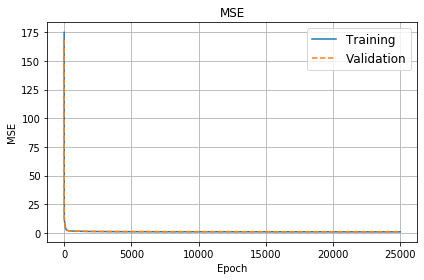

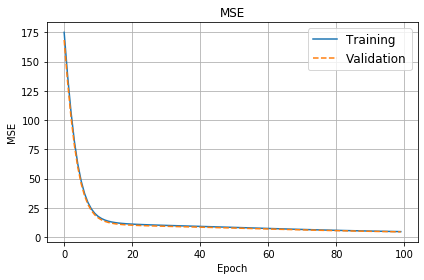

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


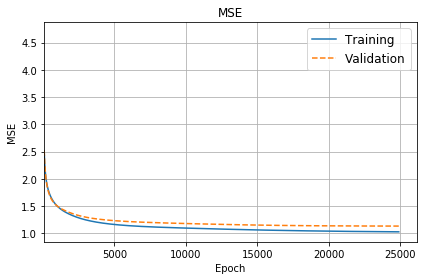

In [4]:
param = {
            "n_layer_units": [10], # con questo si specifica la topologia da provare
            "learning_rate": 0.03,
            "momentum": 0.1,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history(), 100, "underfitting_10_1")

MSE train: 1.8923534693759494 
MSE val: 1.8438638609225737 


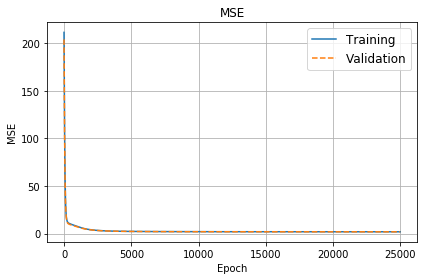

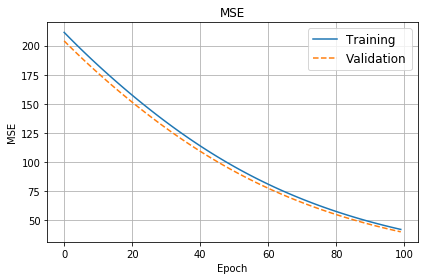

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


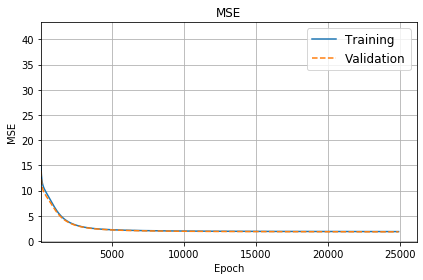

In [7]:
param = {
            "n_layer_units": [10], # con questo si specifica la topologia da provare
            "learning_rate": 0.002,
            "momentum": 0.1,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history(), 100, "underfitting_10_1")

# 20

MSE train: 1.7308504367106765 
MSE val: 1.6932240276009756 


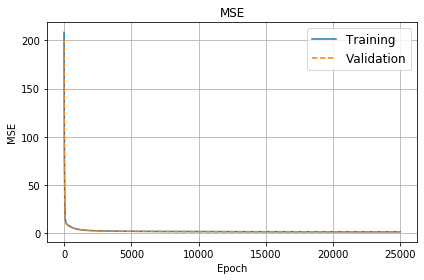

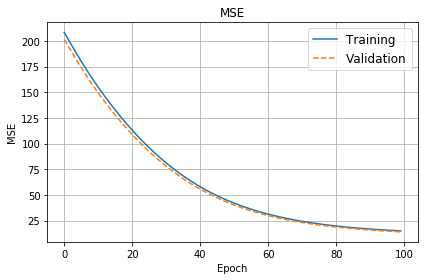

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


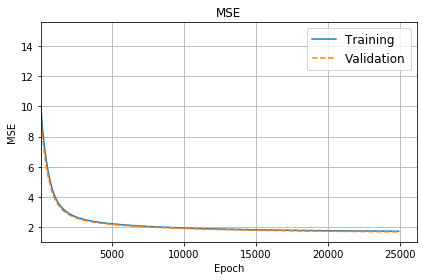

In [5]:
param = {
            "n_layer_units": [20], # con questo si specifica la topologia da provare
            "learning_rate": 0.002,
            "momentum": 0.3,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history(), 100, "underfitting_20_1")

MSE train: 1.1192104896199482 
MSE val: 1.202685367431725 


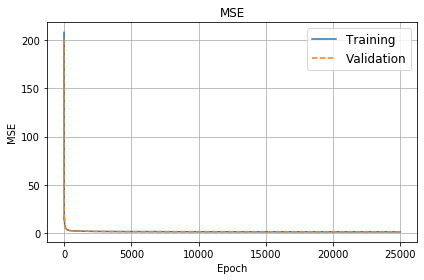

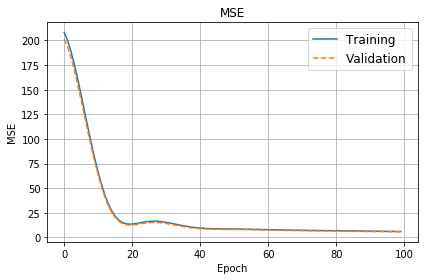

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


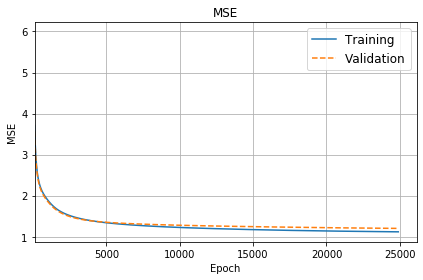

In [17]:
param = {
            "n_layer_units": [20], # con questo si specifica la topologia da provare
            "learning_rate": 0.002,
            "momentum": 0.9,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history(), 100, "underfitting_20_2")

# 50

MSE train: 1.4276408873150206 
MSE val: 1.428062576372431 


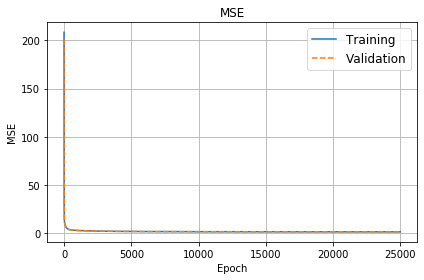

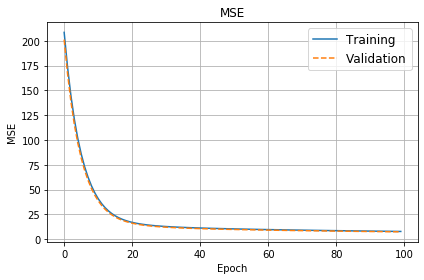

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


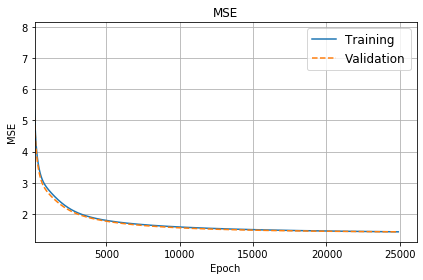

In [4]:
param = {
            "n_layer_units": [50], # con questo si specifica la topologia da provare
            "learning_rate": 0.007,
            "momentum": 0.2,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history(), 100, "underfitting_50_1")

# 80

MSE train: 1.4698120448387175 
MSE val: 1.4631041344767346 


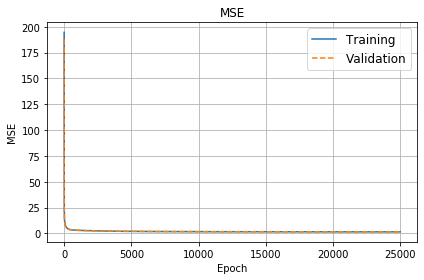

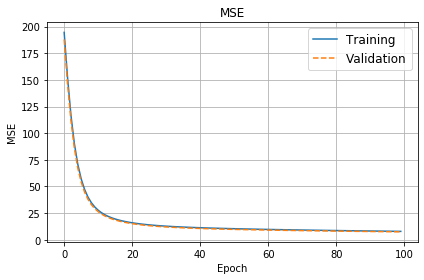

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


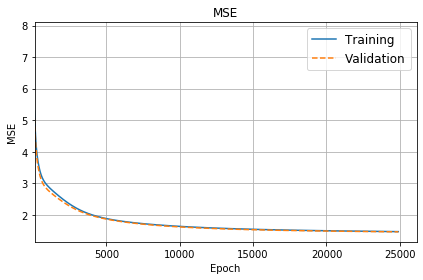

In [18]:
param = {
            "n_layer_units": [80], # con questo si specifica la topologia da provare
            "learning_rate": 0.005,
            "momentum": 0.4,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history(), 100, "underfitting_80_1")

# 100

MSE train: 1.48538011051743 
MSE val: 1.4755916621217253 


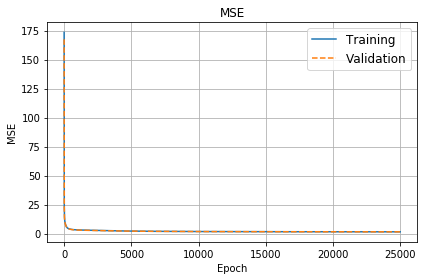

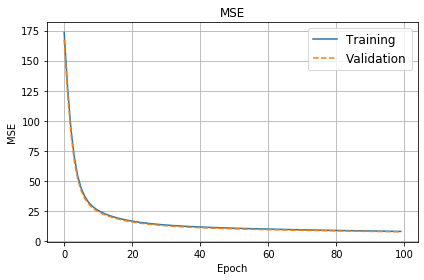

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


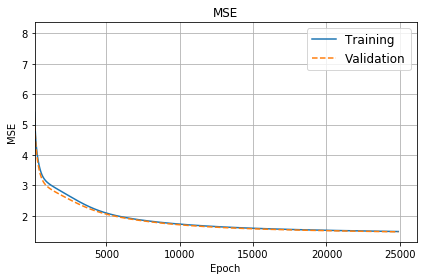

In [20]:
param = {
            "n_layer_units": [100], # con questo si specifica la topologia da provare
            "learning_rate": 0.005,
            "momentum": 0.4,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history(), 100, "underfitting_100_1")